<a href="https://colab.research.google.com/github/YianKim/2022_PythonStudy_face_emotion_recognition/blob/main/v2_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 구글 드라이브


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 라이브러리 불러오기


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import PIL
import pickle
import random

from keras.layers.core import Lambda
from keras import backend as K

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import LSTM
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint
from sklearn.metrics import accuracy_score
from keras.models import load_model

from tqdm import tqdm

## 데이터 불러오기

FER2013.csv : 35887 images

![Dataset overview](https://i.imgur.com/vqlEXw2.png) 

48*48 이미지. value 0~255



In [ ]:
def load_data(dataset_path):
  
  #classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprsie', 'Neutral']

  data = []
  test_data = []
  test_labels = []
  labels =[]

  with open(dataset_path, 'r') as file:
      for line_no, line in enumerate(file.readlines()):
          if 0 < line_no <= 35887:
            curr_class, line, set_type = line.split(',')
            image_data = np.asarray([int(x) for x in line.split()]).reshape(48, 48)
            image_data =image_data.astype(np.uint8)/255.0

            if (set_type.strip() == 'PrivateTest'):
              
              test_data.append(image_data)
              test_labels.append(curr_class)
            else:
              data.append(image_data)
              labels.append(curr_class)
      
      test_data = np.expand_dims(test_data, -1)
      test_labels = to_categorical(test_labels, num_classes = 7)
      data = np.expand_dims(data, -1)   
      labels = to_categorical(labels, num_classes = 7)
    
      return np.array(data), np.array(labels), np.array(test_data), np.array(test_labels)

dataset_path = "/content/drive/MyDrive/파이썬스터디 프로젝트/fer2013.csv/fer2013.csv"
train_data, train_labels, test_data, test_labels = load_data(dataset_path)
#train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = test_size,random_state = seed)

#평가용
test_labels2 = np.argmax(test_labels, axis=1)

# print("Number of images in Training set:", len(train_data))
# print("Number of images in Test set:", len(test_data))

with open('/content/drive/MyDrive/파이썬스터디 프로젝트/aug_array1.pkl', 'rb') as f:
	aug_array1 = pickle.load(f)
 
train_data_aug = np.concatenate((train_data, aug_array1), axis=0)
train_labels_aug = np.concatenate((train_labels, train_labels), axis=0)

## CNN v2.

A. Vulpe-Grigoraşi and O. Grigore, "Convolutional Neural Network Hyperparameters optimization for Facial Emotion Recognition," 2021 12th International Symposium on Advanced Topics in Electrical Engineering (ATEE), 2021, pp. 1-5, doi: 10.1109/ATEE52255.2021.9425073.

In [ ]:
# def PermaDropout(rate):
#     return Lambda(lambda x: K.dropout(x, level=rate))

In [ ]:
# #######HYPERPARAMATERS###########
# epochs = 30
# batch_size = 64
# learning_rate = 0.001
# #################################
  
# model = Sequential()
    
# model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(48, 48, 1), kernel_regularizer=l2(0.01)))
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(PermaDropout(0.4))

# model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(PermaDropout(0.4))

# model.add(Conv2D(192, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(PermaDropout(0.4))

# model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(PermaDropout(0.4))

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(PermaDropout(0.3))
# model.add(Dense(7, activation='softmax'))

# adam = keras.optimizers.Adam(learning_rate)
# model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
# # print(model.summary())

# lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3)
# early_stopper = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=30, mode='auto')
# checkpointer = ModelCheckpoint('weights.hd5', monitor='val_loss', verbose=1, save_best_only=True)

# model.fit(
#           train_data_aug,
#           train_labels_aug,
#           epochs = epochs,
#           batch_size = batch_size,
#           validation_split = 0.3,
#           shuffle = True,
# #           callbacks=[lr_reducer, checkpointer, early_stopper]
#           callbacks=[lr_reducer, early_stopper]
#           )

In [ ]:
# model.save('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_base_model_v2.h5')

In [ ]:
# model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_base_model_v2.h5')

## 모델 결과

CNN
1. no augmentation : 62~63%
2. 2x augmentation : 67~68%
3. 4x augmentation : 67~68%

CNN v2 with MC Dropout, 30 times
1. 2x augmentation : 67~68%

In [ ]:
def model_eval():
  pred_mu = model.predict(test_data)
  for i in range(1, 30):
    pred_mu += model.predict(test_data)
  pred_mu = pred_mu/30
  predicted_test_labels = np.argmax(pred_mu, axis=1)
  return(accuracy_score(test_labels2, predicted_test_labels))

In [ ]:
# model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_base_model_v2.h5')
# model_eval()

## 준지도 pseudo labeling (self train)

모델성능이 70% 미만 -> 틀렸을 가능성이 높은 데이터들은 사용 X (최대한 70% 안에 있는 것을 맞춰서 사용)

수 회 예측결과의 분산이 작은 이미지일수록 기존 데이터셋(labeled)과 비슷하고, 분산이 클 수록 새로운 이미지일까?

dataselection 함수

1. model과 data_no_label을 받고

2. uncertainty에 따라 그룹을 나눠주는 함수

### 진짜 그럴까?

In [ ]:
# model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_base_model_v2.h5')
# data_no_label = test_data

In [ ]:
# pred1 = model.predict(data_no_label)
# pred2 = model.predict(data_no_label)
# pred3 = model.predict(data_no_label)
# pred4 = model.predict(data_no_label)
# pred5 = model.predict(data_no_label)
# pred6 = model.predict(data_no_label)
# pred7 = model.predict(data_no_label)
# pred8 = model.predict(data_no_label)
# pred9 = model.predict(data_no_label)
# pred10 = model.predict(data_no_label)
# pred_mu = (pred1+pred2+pred3+pred4+pred5+pred6+pred7+pred8+pred9+pred10)/10
# pred_var=[]

# for i in range(data_no_label.shape[0]):
#   temp = np.max(list(pred_mu[i]))
#   temp = list(pred_mu[i]).index(temp)
#   pred_var.append(np.var([pred1[i][temp],pred2[i][temp],pred3[i][temp],pred4[i][temp],pred5[i][temp],
#                           pred6[i][temp],pred7[i][temp],pred8[i][temp],pred9[i][temp],pred10[i][temp]]))
  
# group_a = []
# group_a_label = []
# group_b = []
# group_b_label = []

# var_25 = np.percentile(pred_var,25)
# for i in range(len(pred_var)):
#   if pred_var[i] < var_25:
#     group_a.append(i)
#     group_a_label.append(list(pred_mu[i]).index(np.max(list(pred_mu[i]))))
#   else:
#     group_b.append(i)
#     group_b_label.append(list(pred_mu[i]).index(np.max(list(pred_mu[i]))))

# a_train = data_no_label[group_a]
# b_train = data_no_label[group_b]
# a_label = []
# b_label = []

# for i in group_a_label:
#   temp = [0,0,0,0,0,0,0]
#   temp[i] = 1
#   a_label.append(temp)
# for i in group_b_label:
#   temp = [0,0,0,0,0,0,0]
#   temp[i] = 1
#   b_label.append(temp)

# a_label = np.array(a_label)
# b_label = np.array(b_label)

In [ ]:
# var_25 #약 0.014

0.013860531151294708

쉬운 샘플은 잘 구분하고(94%) 어려운 샘플은 못 구분한다(59%)

In [ ]:
# 확실함 = accuracy_score(test_labels2[group_a], group_a_label)
# 불확실함 = accuracy_score(test_labels2[group_b], group_b_label)
# print((확실함,불확실함)) # 유의한 차이가 있다.

(0.939799331103679, 0.587295690936107)


### 0

In [ ]:
def dataselection(cutoff):

  # predict
  pred1 = model.predict(data_no_label)
  pred2 = model.predict(data_no_label)
  pred3 = model.predict(data_no_label)
  pred4 = model.predict(data_no_label)
  pred5 = model.predict(data_no_label)
  pred6 = model.predict(data_no_label)
  pred7 = model.predict(data_no_label)
  pred8 = model.predict(data_no_label)
  pred9 = model.predict(data_no_label)
  pred10 = model.predict(data_no_label)
  pred_mu = (pred1+pred2+pred3+pred4+pred5+pred6+pred7+pred8+pred9+pred10)/10
  pred_var=[]

  for i in range(data_no_label.shape[0]):
    temp = np.max(list(pred_mu[i]))
    temp = list(pred_mu[i]).index(temp)
    pred_var.append(np.var([pred1[i][temp],pred2[i][temp],pred3[i][temp],pred4[i][temp],pred5[i][temp],
                            pred6[i][temp],pred7[i][temp],pred8[i][temp],pred9[i][temp],pred10[i][temp]]))
  
  group_a = []
  group_a_label = []
  group_b = []
  group_b_label = []

  var_25 = np.percentile(pred_var,cutoff)
  for i in range(len(pred_var)):
    if pred_var[i] < var_25:
      group_a.append(i)
      group_a_label.append(list(pred_mu[i]).index(np.max(list(pred_mu[i]))))
    else:
      group_b.append(i)
      group_b_label.append(list(pred_mu[i]).index(np.max(list(pred_mu[i]))))

  a_train = data_no_label[group_a]
  b_train = data_no_label[group_b]
  a_label = []
  b_label = []

  for i in group_a_label:
    temp = [0,0,0,0,0,0,0]
    temp[i] = 1
    a_label.append(temp)
  for i in group_b_label:
    temp = [0,0,0,0,0,0,0]
    temp[i] = 1
    b_label.append(temp)

  a_label = np.array(a_label)
  b_label = np.array(b_label)

  return(a_train, a_label, b_train, b_label)

### 1


In [ ]:
# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/face_array.pkl', 'rb') as f:
# 	data_no_label = pickle.load(f)
# model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_base_model_v2.h5')

In [ ]:
# a_train, a_label, b_train, b_label = dataselection(25)

# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/a_train2.pkl', 'wb') as f:
#   pickle.dump(a_train, f, protocol=pickle.HIGHEST_PROTOCOL)

# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/a_label2.pkl', 'wb') as f:
#   pickle.dump(a_label, f, protocol=pickle.HIGHEST_PROTOCOL)

# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/b_train2.pkl', 'wb') as f:
#   pickle.dump(b_train, f, protocol=pickle.HIGHEST_PROTOCOL)

# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/b_label2.pkl', 'wb') as f:
#   pickle.dump(b_label, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/content/drive/MyDrive/파이썬스터디 프로젝트/a_train2.pkl', 'rb') as f:
	a_train = pickle.load(f)
 
with open('/content/drive/MyDrive/파이썬스터디 프로젝트/a_label2.pkl', 'rb') as f:
	a_label = pickle.load(f)
 
with open('/content/drive/MyDrive/파이썬스터디 프로젝트/b_train2.pkl', 'rb') as f:
	b_train = pickle.load(f)
 
with open('/content/drive/MyDrive/파이썬스터디 프로젝트/b_label2.pkl', 'rb') as f:
	b_label = pickle.load(f)

In [ ]:
a_train = np.concatenate((train_data_aug, a_train), 0)
a_label = np.concatenate((train_labels_aug, a_label), 0)

In [ ]:
# model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_base_model_v2.h5')

# #######HYPERPARAMATERS###########
# epochs = 10 #재학습
# batch_size = 64
# learning_rate = 1e-7 #재학습
# #################################

# lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3)
# early_stopper = EarlyStopping(monitor='val_acc', min_delta=0, patience=6, mode='auto')
# checkpointer = ModelCheckpoint('/content/drive/MyDrive/파이썬스터디 프로젝트/Model/weights.hd5', monitor='val_loss', verbose=1, save_best_only=True)

# model.fit(
#           a_train,
#           a_label,
#           epochs = epochs,
#           batch_size = batch_size,
#           # validation_split = 0.5,
#           shuffle = True,
#           # callbacks=[lr_reducer, checkpointer, early_stopper],
#           # class_weight=class_weight
#           )

In [ ]:
# model.save('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_220113_model_v2.h5')

67~68%

In [ ]:
# model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_220113_model_v2.h5')
# model_eval()

### 2

In [ ]:
# model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_220113_model_v2.h5')
# data_no_label = b_train

In [ ]:
train_data_aug = a_train
train_labels_aug = a_label

In [ ]:
# a_train, a_label, b_train, b_label = dataselection(33)

# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/a_train3.pkl', 'wb') as f:
#   pickle.dump(a_train, f, protocol=pickle.HIGHEST_PROTOCOL)

# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/a_label3.pkl', 'wb') as f:
#   pickle.dump(a_label, f, protocol=pickle.HIGHEST_PROTOCOL)

# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/b_train3.pkl', 'wb') as f:
#   pickle.dump(b_train, f, protocol=pickle.HIGHEST_PROTOCOL)

# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/b_label3.pkl', 'wb') as f:
#   pickle.dump(b_label, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/content/drive/MyDrive/파이썬스터디 프로젝트/a_train3.pkl', 'rb') as f:
	a_train = pickle.load(f)
 
with open('/content/drive/MyDrive/파이썬스터디 프로젝트/a_label3.pkl', 'rb') as f:
	a_label = pickle.load(f)
 
with open('/content/drive/MyDrive/파이썬스터디 프로젝트/b_train3.pkl', 'rb') as f:
	b_train = pickle.load(f)
 
with open('/content/drive/MyDrive/파이썬스터디 프로젝트/b_label3.pkl', 'rb') as f:
	b_label = pickle.load(f)

In [ ]:
a_train = np.concatenate((train_data_aug, a_train), 0)
a_label = np.concatenate((train_labels_aug, a_label), 0)

In [ ]:
# model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_220113_model_v2.h5')

# #######HYPERPARAMATERS###########
# epochs = 10 #재학습
# batch_size = 64
# learning_rate = 0.1**7 #재학습
# #################################

# lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3)
# early_stopper = EarlyStopping(monitor='val_acc', min_delta=0, patience=6, mode='auto')
# checkpointer = ModelCheckpoint('/content/drive/MyDrive/파이썬스터디 프로젝트/Model/weights.hd5', monitor='val_loss', verbose=1, save_best_only=True)

# model.fit(
#           a_train,
#           a_label,
#           epochs = epochs,
#           batch_size = batch_size,
#           # validation_split = 0.5,
#           shuffle = True,
#           # callbacks=[lr_reducer, checkpointer, early_stopper],
#           # class_weight=class_weight
#           )

In [ ]:
# model.save('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_220114_model_v2.h5')

68~69%

In [ ]:
# model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_220114_model_v2.h5')
# model_eval()

### 3

In [ ]:
# model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_220114_model_v2.h5')
# data_no_label = b_train

In [ ]:
train_data_aug = a_train
train_labels_aug = a_label

In [ ]:
# a_train, a_label, b_train, b_label = dataselection(50)

# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/a_train4.pkl', 'wb') as f:
#   pickle.dump(a_train, f, protocol=pickle.HIGHEST_PROTOCOL)

# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/a_label4.pkl', 'wb') as f:
#   pickle.dump(a_label, f, protocol=pickle.HIGHEST_PROTOCOL)

# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/b_train4.pkl', 'wb') as f:
#   pickle.dump(b_train, f, protocol=pickle.HIGHEST_PROTOCOL)

# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/b_label4.pkl', 'wb') as f:
#   pickle.dump(b_label, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/content/drive/MyDrive/파이썬스터디 프로젝트/a_train4.pkl', 'rb') as f:
	a_train = pickle.load(f)
 
with open('/content/drive/MyDrive/파이썬스터디 프로젝트/a_label4.pkl', 'rb') as f:
	a_label = pickle.load(f)
 
with open('/content/drive/MyDrive/파이썬스터디 프로젝트/b_train4.pkl', 'rb') as f:
	b_train = pickle.load(f)
 
with open('/content/drive/MyDrive/파이썬스터디 프로젝트/b_label4.pkl', 'rb') as f:
	b_label = pickle.load(f)

In [ ]:
a_train = np.concatenate((train_data_aug, a_train), 0)
a_label = np.concatenate((train_labels_aug, a_label), 0)

In [ ]:
# model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_220114_model_v2.h5')

# #######HYPERPARAMATERS###########
# epochs = 10 #재학습
# batch_size = 64
# learning_rate = 0.1**7 #재학습
# #################################

# lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3)
# early_stopper = EarlyStopping(monitor='val_acc', min_delta=0, patience=6, mode='auto')
# checkpointer = ModelCheckpoint('/content/drive/MyDrive/파이썬스터디 프로젝트/Model/weights.hd5', monitor='val_loss', verbose=1, save_best_only=True)

# model.fit(
#           a_train,
#           a_label,
#           epochs = epochs,
#           batch_size = batch_size,
#           # validation_split = 0.5,
#           shuffle = True,
#           # callbacks=[lr_reducer, checkpointer, early_stopper],
#           # class_weight=class_weight
#           )

In [ ]:
# model.save('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_220115_model_v2.h5')

67~68%

In [ ]:
# model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_220115_model_v2.h5')
# model_eval()

0.679019225410978

## GAN

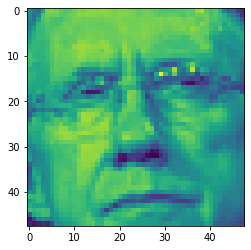

In [ ]:
plt.imshow(train_data[123].reshape([48,48]))

In [ ]:
np.mean(train_data.reshape([-1])), np.var(train_data.reshape([-1]))

(0.5075275393383544, 0.06502519056334992)

In [ ]:
np.mean(data_no_label.reshape([-1])), np.var(data_no_label.reshape([-1]))

(0.4479560509556771, 0.06264984134040247)